In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading data
filename = "movie_metadata.csv"
db = pd.read_csv(filename)

# Filtering dataset to remove non-numeric and subjective data
numericalList = []
for colname in db:
    if (type(db[colname][0]) != str):
        numericalList.append(colname)

numDataset = pd.DataFrame()

for numColName in numericalList:
    _ = ['imdb_score', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 
         'cast_total_facebook_likes', 'actor_2_facebook_likes', 'movie_facebook_likes']
    if numColName in _:
            continue
    else:
        numDataset[numColName] = db[numColName]
numDataset['imdb_score'] = db['imdb_score']



    
numDataset = numDataset.fillna(value=0, axis=1)
    
array = numDataset.values

print(numDataset.head(3))

   num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   

   facenumber_in_poster  num_user_for_reviews       budget  title_year  \
0                   0.0                3054.0  237000000.0      2009.0   
1                   0.0                1238.0  300000000.0      2007.0   
2                   1.0                 994.0  245000000.0      2015.0   

   aspect_ratio  imdb_score  
0          1.78         7.9  
1          2.35         7.1  
2          2.35         6.8  


                        num_critic_for_reviews  duration     gross  \
num_critic_for_reviews                1.000000  0.269515  0.524832   
duration                              0.269515  1.000000  0.254709   
gross                                 0.524832  0.254709  1.000000   
num_voted_users                       0.626616  0.313818  0.651528   
facenumber_in_poster                 -0.033915  0.004436 -0.023950   
num_user_for_reviews                  0.611972  0.329743  0.582930   
budget                                0.127850  0.074762  0.123506   
title_year                            0.153433  0.262090  0.093720   
aspect_ratio                          0.054952 -0.017209  0.025897   
imdb_score                            0.299677  0.256352  0.176445   
profit                                0.036812 -0.026731  0.022764   

                        num_voted_users  facenumber_in_poster  \
num_critic_for_reviews         0.626616             -0.033915   
duration                     

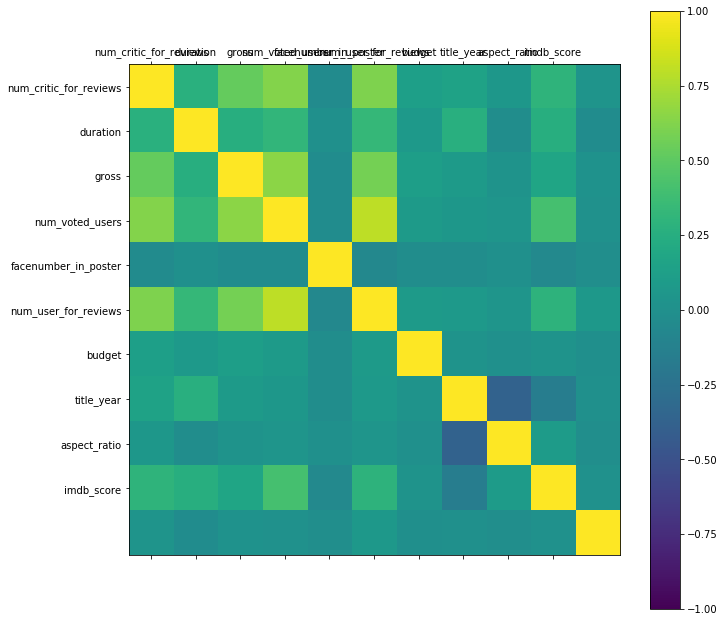

In [114]:
correlations = numDataset.corr(method='pearson')
# plot correlation matrix
print(correlations)
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numDataset.columns)
ax.set_yticklabels(numDataset.columns)
plt.show()
plt.close()

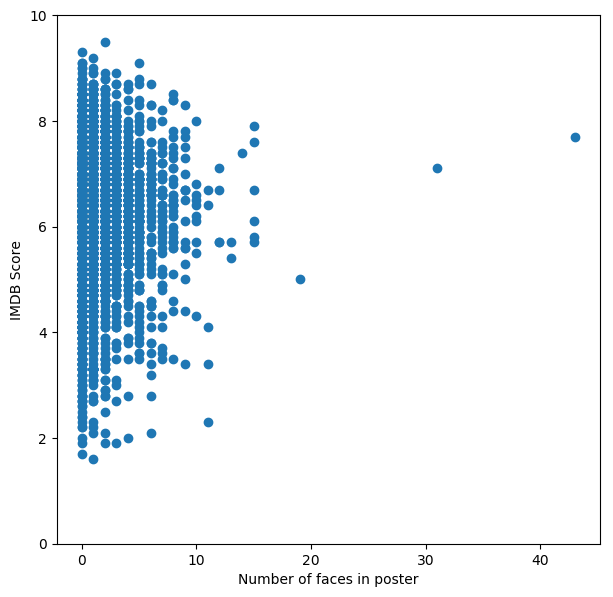

In [36]:
# Face vs rating
fig = plt.figure(figsize=(7,7), dpi=100)
plt.scatter(numDataset['facenumber_in_poster'], numDataset['imdb_score'])
plt.ylim([0,10])
plt.ylabel('IMDB Score')
plt.xlabel('Number of faces in poster')
plt.show()
plt.close()

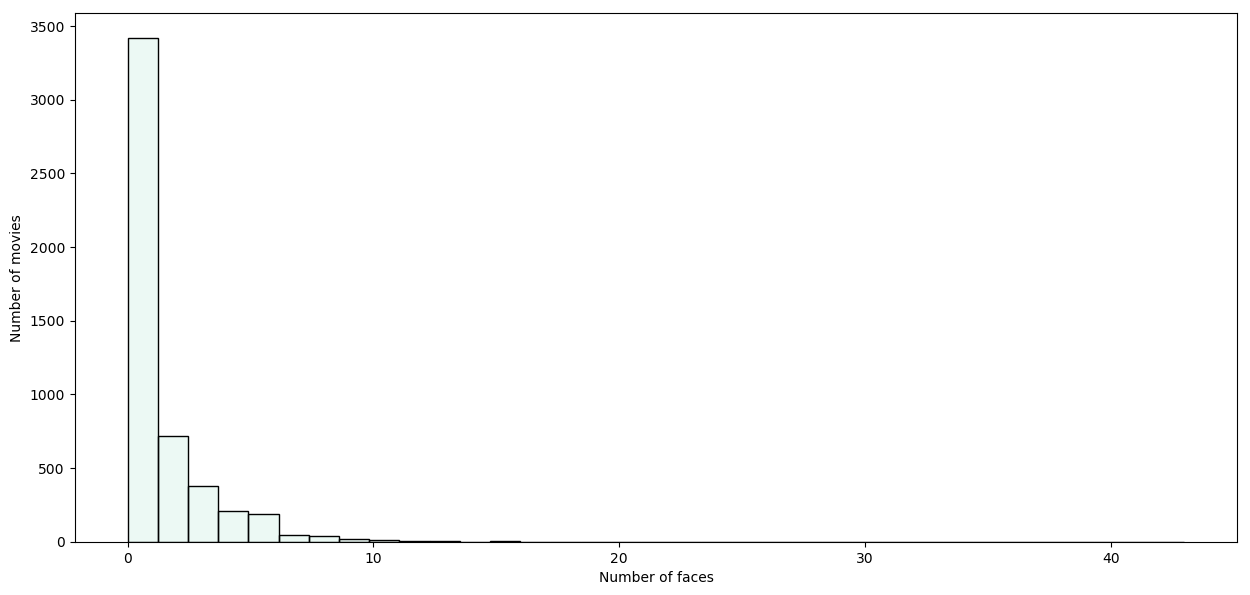

In [43]:
# Number of faces in movie posters
fig = plt.figure(figsize=(15,7), dpi=100)
plt.hist(numDataset['facenumber_in_poster'], bins=35, histtype='bar', edgecolor='black', fc=(0.3,0.8,0.6,0.1))
plt.ylabel('Number of movies')
plt.xlabel('Number of faces')
plt.show()
plt.close()

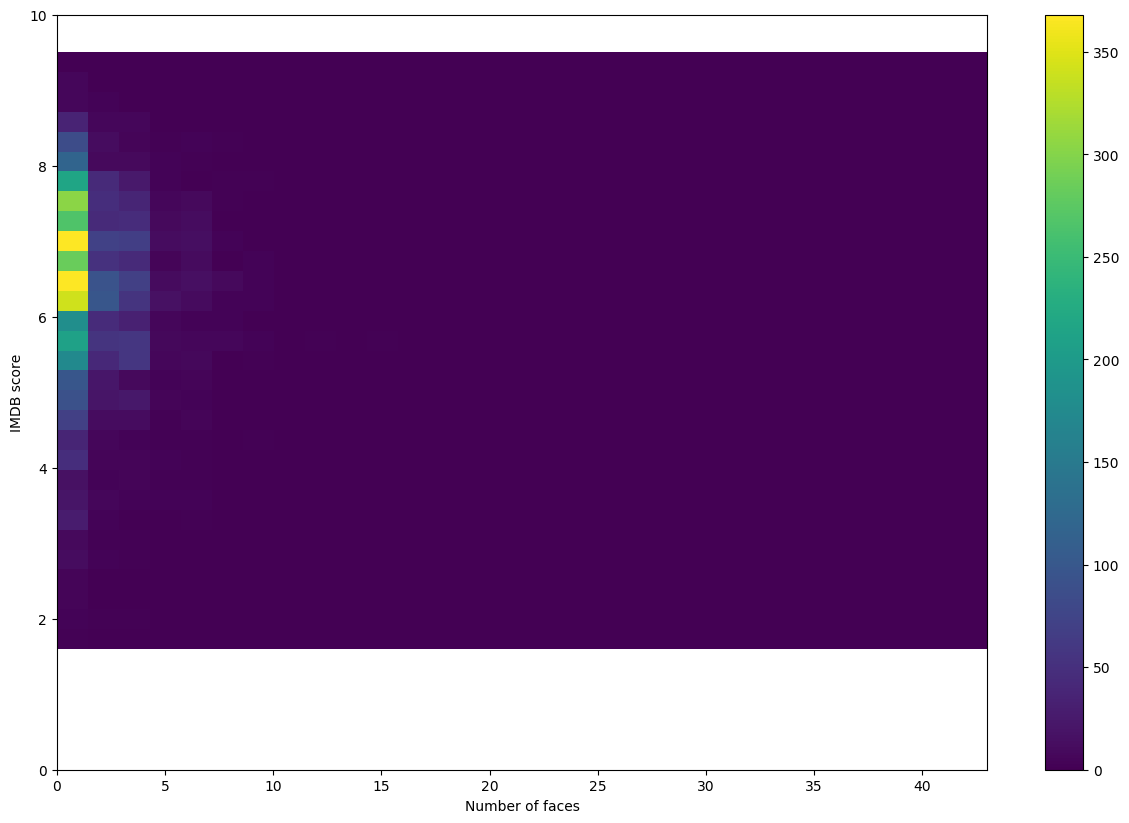

In [99]:

numDataset = numDataset.sort_values(ascending=True, by='facenumber_in_poster')

#for i in range(44):
#    scoreVsFaces = numDataset.loc[(numDataset["facenumber_in_poster"] == i) & 
#                                  (numDataset["imdb_score"] >= 5), 'imdb_score'].values
#    print(scoreVsFaces)
#    print("The number of movies with %d faces in its poster is")

#print(numDataset.sort_values(ascending=True, by='imdb_score')['imdb_score'])
fig = plt.figure(figsize=(15,10), dpi=100)
plt.hist2d(x=numDataset['facenumber_in_poster'], y=numDataset['imdb_score'], bins=30)
plt.colorbar()
plt.xlabel('Number of faces')
plt.ylabel('IMDB score')
plt.ylim([0,10])
plt.xlim([0,43])
plt.show()
plt.close()

In [113]:
#numDataset['profit'] = (numDataset['gross'] - numDataset['budget']) / numDataset['budget'] *100
#numDataset_no_zeros = numDataset.query('line_race != 0')
#print(numDataset.sort_values(ascending=True, by='profit')['profit'])
fig = plt.figure()
plt.hist2d(x=numDataset['gross'], y=numDataset['imdb_score'], bins=30)
plt.colorbar()
plt.xlabel('Profit (%)')
plt.ylabel('IMDB score')
plt.ylim([0,10])
plt.xlim([-300,300])
plt.show()
plt.close()

ValueError: Image size of 565816621x593 pixels is too large. It must be less than 2^16 in each direction.